In [45]:
import os
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import pandas as pd

In [143]:
df = pd.read_csv('../../data/results/cd_vs_powell.csv')
df

,it,Bits weights,Bits act,l1.CD,l1.Powell,l2.CD,l2.Powell,l3.CD,l3.Powell
0,init,32,4,58.60%,58.60%,68.10%,68.10%,68.20%,68.60%
1,iter 1,32,4,67.80%,67.80%,68.70%,68.10%,68.80%,68.20%
2,iter 2,32,4,68.40%,68.60%,68.70%,68.20%,68.20%,68.20%
3,init,32,3,38.50%,38.50%,63.30%,63.30%,65.70%,65.70%
4,iter 1,32,3,64.30%,64.60%,66.40%,64.80%,65.70%,66.20%
5,iter 2,32,3,66.20%,64.60%,65.40%,65.70%,65.00%,66.20%
6,init,32,2,4.70%,4.70%,33.00%,33.00%,47.80%,47.80%
7,iter 1,32,2,23.90%,23.90%,45.60%,47.80%,51.20%,49.00%
8,iter 2,32,2,41.70%,41.70%,51.80%,51.00%,48.90%,49.10%
9,init,4,32,0.50%,0.50%,48.70%,48.70%,57.20%,57.20%


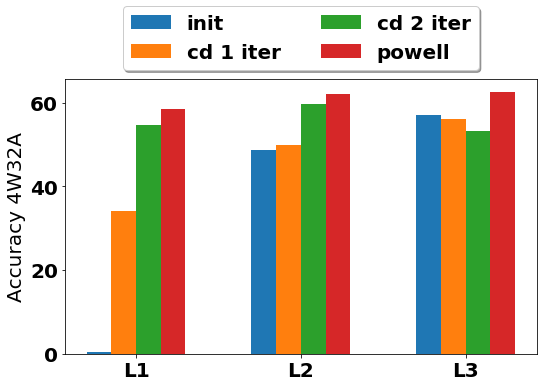

In [182]:
rcParams['figure.figsize'] = 8, 6
font = {'weight' : 'normal', 'size'   : 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

bits_w = 4
bits_a = 32
groups = ['L1', 'L2', 'L3']
ind = np.arange(len(groups))
temp = df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)]
temp = temp[temp['it'] == 'init'][['l1.CD', 'l2.CD', 'l3.CD']]
init = tofloat_list(temp.iloc[0])

temp = df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)]
temp = temp[temp['it'] == 'iter 1'][['l1.CD', 'l2.CD', 'l3.CD']]
cd1 = tofloat_list(temp.iloc[0])

temp = df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)]
temp = temp[temp['it'] == 'iter 2'][['l1.CD', 'l2.CD', 'l3.CD']]
cd2 = tofloat_list(temp.iloc[0])

temp = df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)]
temp = temp[temp['it'] == 'iter 2'][['l1.Powell', 'l2.Powell', 'l3.Powell']]
powell = tofloat_list(temp.iloc[0])

width = 0.15
plt.bar(ind, init, width=width)
plt.bar(ind + width, cd1, width=width)
plt.bar(ind + 2*width, cd2, width=width)
plt.bar(ind + 3*width, powell, width=width)

plt.ylabel('Accuracy {}W{}A'.format(bits_w, bits_a))
plt.legend(['init', 'cd 1 iter', 'cd 2 iter', 'powell'], loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=2, fancybox=True, shadow=True)
plt.xticks(ind + 1.5*width, groups)
plt.tight_layout()
plt.savefig('../../fig/cd_vs_powell_{}W{}A.png'.format(bits_w, bits_a))

In [92]:
font = {'weight' : 'normal', 'size'   : 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

def tofloat(s):
    # assume s is string in format dd.dd%
    return float(s.replace('%', ''))

def tofloat_list(s):
    return [tofloat(item) for item in s]

print(tofloat('33.12%'))
print(tofloat_list(pd.Series(['1.2%', '5%'])))

33.12
[1.2, 5.0]


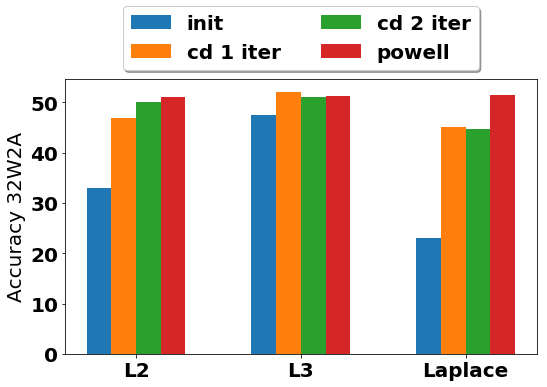

In [36]:
rcParams['figure.figsize'] = 8, 6
font = {'weight' : 'normal', 'size'   : 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

bits_w = 32
bits_a = 2
groups = ['L2', 'L3', 'Laplace']
ind = np.arange(len(groups))
init_names = ['l2', 'l3', 'laplace']
init = [tofloat((df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n]).item()) for n in init_names]
cd1 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(1)'].item()) for n in init_names]
cd2 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(2)'].item()) for n in init_names]
powell = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.powell'].item()) for n in init_names]

width = 0.15
plt.bar(ind, init, width=width)
plt.bar(ind + width, cd1, width=width)
plt.bar(ind + 2*width, cd2, width=width)
plt.bar(ind + 3*width, powell, width=width)

plt.ylabel('Accuracy {}W{}A'.format(bits_w, bits_a))
plt.legend(['init', 'cd 1 iter', 'cd 2 iter', 'powell'], loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=2, fancybox=True, shadow=True)
plt.xticks(ind + 1.5*width, groups)
plt.tight_layout()
plt.savefig('../../fig/cd_vs_powell_{}W{}A.png'.format(bits_w, bits_a))

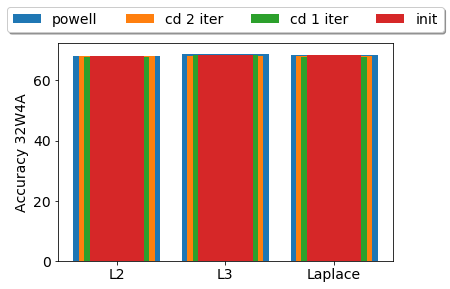

In [130]:
bits_w = 32
bits_a = 4
groups = ['L2', 'L3', 'Laplace']
ind = np.arange(len(groups))
init_names = ['l2', 'l3', 'laplace']
init = [tofloat((df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n]).item()) for n in init_names]
cd1 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(1)'].item()) for n in init_names]
cd2 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(2)'].item()) for n in init_names]
powell = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.powell'].item()) for n in init_names]

plt.bar(ind, powell, width=0.8)
plt.bar(ind, cd2, width=0.7)
plt.bar(ind, cd1, width=0.6)
plt.bar(ind, init, width=0.5)

plt.ylabel('Accuracy {}W{}A'.format(bits_w, bits_a))
plt.legend(['powell', 'cd 2 iter', 'cd 1 iter', 'init'], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=4, fancybox=True, shadow=True)
plt.xticks(ind, groups);